Dataset is available [here](https://www.kaggle.com/datasets/nishantsingh96/refined-bookcorpus-dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read just first 5 rows
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/datasets/BookCorpus3.csv', nrows = 1000,names=['story'])
print(df.head())
print("Total stories:", len(df))

                                               story
0                                                  0
1  she began getting up first thing in the mornin...
2  caitrin hid the fact that she was a woman behi...
3  she considered strapping down her breasts, and...
4  as hard as it had been for caitrin to convince...
Total stories: 1000


In [ ]:
def clean_text(text):
    text = text.strip()
    text = text.replace('\n', ' ')
    return text
df['story'] = df['story'].apply(clean_text)

In [ ]:
from pathlib import Path

# Join all stories into one text
all_text = "\n\n".join(df['story'].astype(str).tolist())

# Save it
Path("stories_dataset.txt").write_text(all_text)

436290

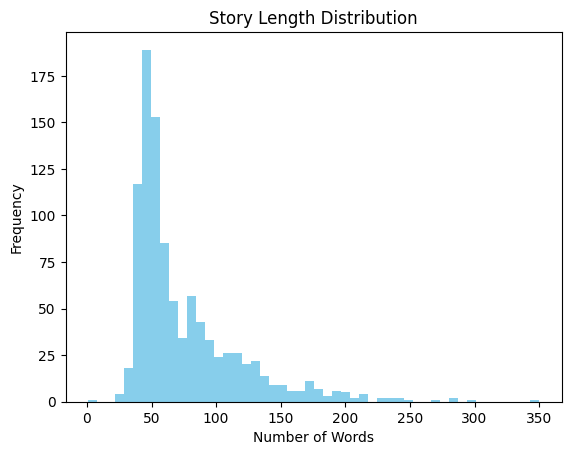

In [ ]:
import matplotlib.pyplot as plt

df['story_length'] = df['story'].apply(lambda x: len(str(x).split()))
plt.hist(df['story_length'], bins=50, color='skyblue')
plt.title("Story Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
!pip install transformers datasets

from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import TextDataset, DataCollatorForLanguageModeling

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # GPT-2 has no pad token

def load_dataset(file_path, tokenizer, block_size=128):
    return TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size
    )

def create_data_collator(tokenizer):
    return DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False
    )

train_dataset = load_dataset("stories_dataset.txt", tokenizer)
data_collator = create_data_collator(tokenizer)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
from transformers import Trainer, TrainingArguments

model = GPT2LMHeadModel.from_pretrained("gpt2")

training_args = TrainingArguments(
    output_dir="./gpt2-story-gen",
    overwrite_output_dir=True,
    num_train_epochs=5,
    per_device_train_batch_size=2,
    save_steps=500,
    save_total_limit=2,
    prediction_loss_only=True,
    logging_dir='./logs',
    logging_steps=100,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

trainer.train()


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: vamsi22bcd22 (vamsi22bcd22-iiitkottayam) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
100,3.983900
200,3.659900
300,3.594300
400,3.411900
500,3.143100
600,3.090600
700,3.128900
800,2.879500
900,2.802100
1000,2.869400


TrainOutput(global_step=1840, training_loss=2.935660001505976, metrics={'train_runtime': 268.7747, 'train_samples_per_second': 13.673, 'train_steps_per_second': 6.846, 'total_flos': 240062054400000.0, 'train_loss': 2.935660001505976, 'epoch': 5.0})

In [ ]:
trainer.save_model("./gpt2-story-gen")
tokenizer.save_pretrained("./gpt2-story-gen")

('./gpt2-story-gen/tokenizer_config.json',
 './gpt2-story-gen/special_tokens_map.json',
 './gpt2-story-gen/vocab.json',
 './gpt2-story-gen/merges.txt',
 './gpt2-story-gen/added_tokens.json')

In [ ]:
import textwrap
from transformers import pipeline, AutoTokenizer

# Load the tokenizer and the trained model from local path
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

generator = pipeline(
    'text-generation',
    model='./gpt2-story-gen',
    tokenizer=tokenizer,
    clean_up_tokenization_spaces=True
)

# Generate multiple story variations
outputs = generator(
    "A retired detective receives anonymous letters detailing murders that haven’t happened yet—but each one comes true within days.",
    max_length=750,
    num_return_sequences=3,
    do_sample=True,
    top_p=0.95,
    temperature=0.9,
    repetition_penalty=1.2,
    truncation=True
)

# Print each generated story neatly
print("\n--- Generated Stories ---\n")
for i, output in enumerate(outputs):
    story = output['generated_text'].replace('\n', ' ').strip()
    print(f"Story {i+1}:\n{textwrap.fill(story, width=100)}\n")


Device set to use cuda:0



--- Generated Stories ---

Story 1:
A retired detective receives anonymous letters detailing murders that haven’t happened yet—but each
one comes true within days. , according to afb court documents, the witness who testified in a
capital murder case brought forward testimony from his own neighborhood during which eyewitness
testimonies were insufficient and made it seem as though there was no way any of us could know for
certain what occurred on 8 september 2017 at creech bush ab until after midnight i hovered over my
shoulder when someone fired. four shots rang out then engulfed our city before we knew anything
about this heinous crime (exceptional weather conditions) or whether jessica had helped carry them
off with her shotgun she still felt unsafe due t/n 781 1f6 2d siren calls being heard throughout
town including an aerial demonstration march across sweden's northern border iaw witnesses
interviewed by korea national news daily wuwait county supreme courts district 6 president 

In [ ]:
# from IPython.display import Markdown
# def generate_story(prompt):
#     return generator(prompt, max_length=250, temperature=0.9)[0]['generated_text']

# # Try different openings
# output=generate_story("There is a murder happened in a city in which police assumed it is done by serial killer.")
# Markdown(output)

In [ ]:
import textwrap
from transformers import pipeline, AutoTokenizer
from IPython.display import display, HTML

# Load tokenizer and model from local path
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

generator = pipeline(
    'text-generation',
    model='./gpt2-story-gen',
    tokenizer=tokenizer,
    clean_up_tokenization_spaces=True
)

# Prompt for the stories
prompt = "A dystopian city where the "

# Generate multiple story variations
outputs = generator(
    prompt,
    max_length=750,
    num_return_sequences=3,
    do_sample=True,
    top_p=0.95,
    temperature=0.9,
    repetition_penalty=1.2,
    truncation=True
)

# Function to show each story in a styled card
def show_stories_ui(story_list):
    cards = ""
    for i, story in enumerate(story_list):
        cleaned = story['generated_text'].replace('\n', ' ').strip()
        wrapped = textwrap.fill(cleaned, width=100)
        cards += f"""
        <div style="
            background-color: #f9f9f9;
            padding: 20px;
            margin-bottom: 20px;
            border-left: 5px solid #555;
            border-radius: 10px;
            font-family: 'Segoe UI', sans-serif;
            color: #222;
            box-shadow: 2px 2px 12px rgba(0,0,0,0.1);
        ">
            <h3 style="margin-top: 0;">🕵️‍♂️ Crime Thriller Story {i+1}</h3>
            <p style="line-height: 1.6; white-space: pre-wrap;">{wrapped}</p>
        </div>
        """
    display(HTML(cards))

# Display the stories
show_stories_ui(outputs)


Device set to use cuda:0


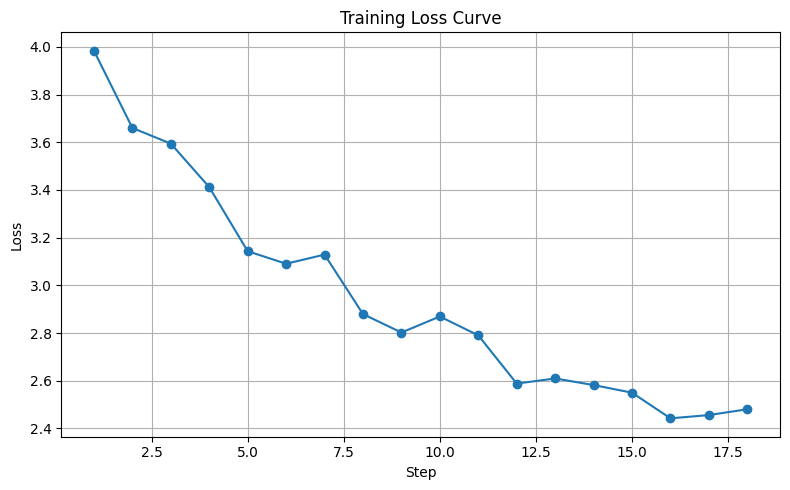

In [ ]:
import matplotlib.pyplot as plt

# Get loss values
loss_values = [log["loss"] for log in trainer.state.log_history if "loss" in log]
steps = list(range(1, len(loss_values)+1))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(steps, loss_values, marker='o')
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.tight_layout()
plt.show()